**arboles de desicion**

In [1]:
#importacion de librerias
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
Datos = pd.read_csv(r"C:\Users\ACER\Desktop\arbol de deciciones.csv")


In [3]:
Datos.head(6)

,Acidez_fija,acidez_volátil,ácido_cítrico,azúcar_residual,cloruros,dióxido_de_azufre_libre,dióxido_de_azufre_total,densidad,pH,sulfatos,alcohol,calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [4]:
Datos.shape

(1599, 12)

In [5]:
Datos.describe()


,Acidez_fija,acidez_volátil,ácido_cítrico,azúcar_residual,cloruros,dióxido_de_azufre_libre,dióxido_de_azufre_total,densidad,pH,sulfatos,alcohol,calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Acidez_fija              1599 non-null   float64
 1   acidez_volátil           1599 non-null   float64
 2   ácido_cítrico            1599 non-null   float64
 3   azúcar_residual          1599 non-null   float64
 4   cloruros                 1599 non-null   float64
 5   dióxido_de_azufre_libre  1599 non-null   float64
 6   dióxido_de_azufre_total  1599 non-null   float64
 7   densidad                 1599 non-null   float64
 8   pH                       1599 non-null   float64
 9   sulfatos                 1599 non-null   float64
 10  alcohol                  1599 non-null   float64
 11  calidad                  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
Datos.isna().sum()

Acidez_fija                0
acidez_volátil             0
ácido_cítrico              0
azúcar_residual            0
cloruros                   0
dióxido_de_azufre_libre    0
dióxido_de_azufre_total    0
densidad                   0
pH                         0
sulfatos                   0
alcohol                    0
calidad                    0
dtype: int64

In [8]:
print(Datos.columns)

Index(['Acidez_fija', 'acidez_volátil', 'ácido_cítrico', 'azúcar_residual',
       'cloruros', 'dióxido_de_azufre_libre', 'dióxido_de_azufre_total',
       'densidad', 'pH', 'sulfatos', 'alcohol', 'calidad'],
      dtype='object')


(array([ 45., 229., 542., 371., 188., 110.,  76.,  26.,   5.,   7.]),
 array([ 4.6 ,  5.73,  6.86,  7.99,  9.12, 10.25, 11.38, 12.51, 13.64,
        14.77, 15.9 ]),
 <BarContainer object of 10 artists>)

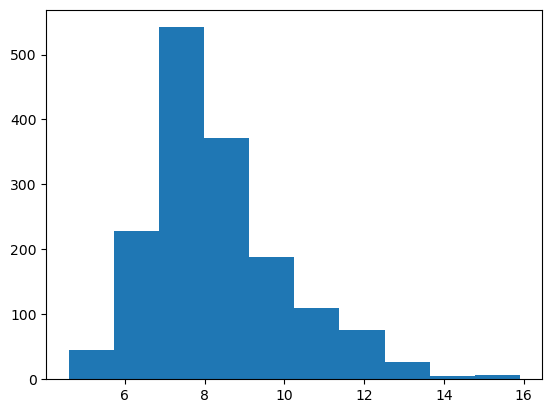

In [9]:
plt.hist(Datos.Acidez_fija)

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

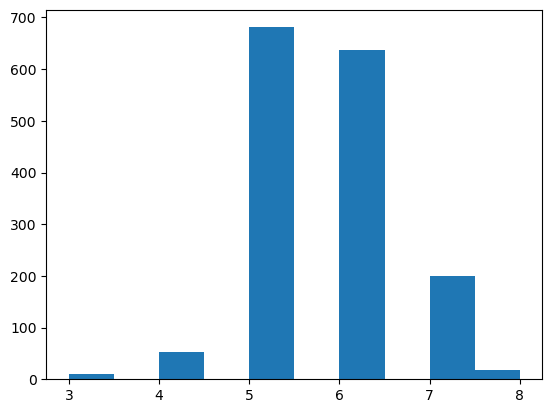

In [10]:
plt.hist(Datos.calidad)

<Axes: xlabel='pH', ylabel='alcohol'>

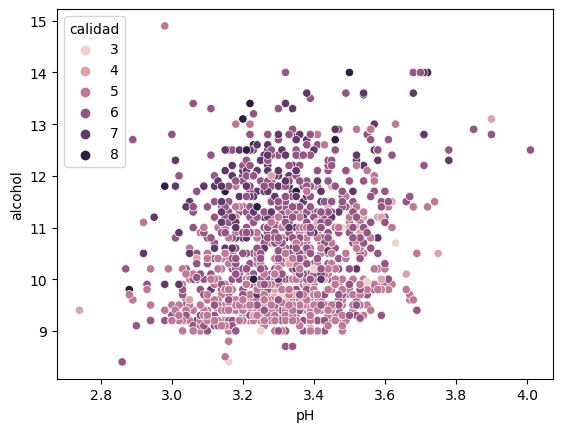

In [11]:
sns.scatterplot(x = "pH", y = "alcohol", hue = "calidad",data=Datos)

In [12]:
predictors_col=["ácido_cítrico","azúcar_residual","cloruros","dióxido_de_azufre_libre","dióxido_de_azufre_total","densidad","sulfatos","alcohol"]
target_col=["calidad"]


In [13]:
predictors= Datos[predictors_col]
target= Datos[target_col]

In [14]:
predictors

,ácido_cítrico,azúcar_residual,cloruros,dióxido_de_azufre_libre,dióxido_de_azufre_total,densidad,sulfatos,alcohol
0,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4
1,0.00,2.6,0.098,25.0,67.0,0.99680,0.68,9.8
2,0.04,2.3,0.092,15.0,54.0,0.99700,0.65,9.8
3,0.56,1.9,0.075,17.0,60.0,0.99800,0.58,9.8
4,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4
...,...,...,...,...,...,...,...,...
1594,0.08,2.0,0.090,32.0,44.0,0.99490,0.58,10.5
1595,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2
1596,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0
1597,0.12,2.0,0.075,32.0,44.0,0.99547,0.71,10.2


In [15]:
target

,calidad
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [16]:
corr=predictors.corr()
corr

,ácido_cítrico,azúcar_residual,cloruros,dióxido_de_azufre_libre,dióxido_de_azufre_total,densidad,sulfatos,alcohol
ácido_cítrico,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,0.312770,0.109903
azúcar_residual,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,0.005527,0.042075
cloruros,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,0.371260,-0.221141
dióxido_de_azufre_libre,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.051658,-0.069408
dióxido_de_azufre_total,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,0.042947,-0.205654
densidad,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,0.148506,-0.496180
sulfatos,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,1.000000,0.093595
alcohol,0.109903,0.042075,-0.221141,-0.069408,-0.205654,-0.496180,0.093595,1.000000


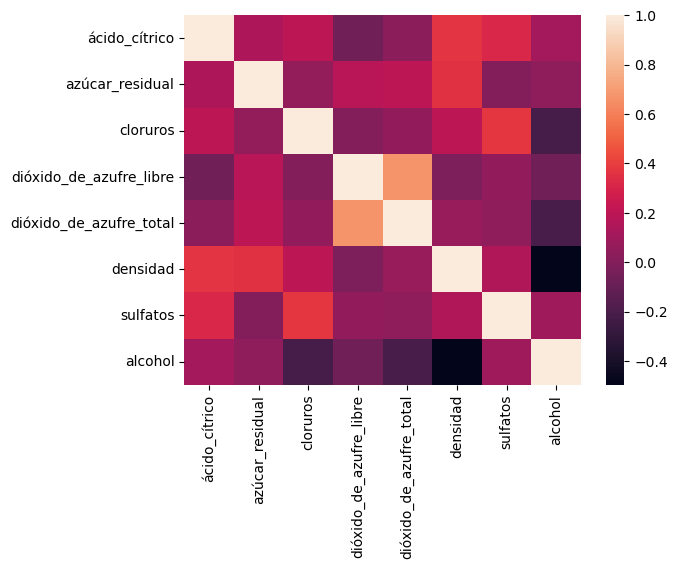

In [17]:
sns.heatmap(corr)
plt.show()


division de dataset

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.15,random_state=13)

In [19]:
tree= DecisionTreeClassifier()

In [20]:
arbol=tree.fit(X_train,Y_train)

[Text(0.5216926314386483, 0.975, 'x[7] <= 10.525\ngini = 0.644\nsamples = 1359\nvalue = [9, 46, 572, 546, 173, 13]'),
 Text(0.2415902846128609, 0.925, 'x[6] <= 0.535\ngini = 0.545\nsamples = 826\nvalue = [6, 30, 481, 278, 31, 0]'),
 Text(0.059465223097112864, 0.875, 'x[1] <= 9.3\ngini = 0.372\nsamples = 193\nvalue = [2, 14, 150, 26, 1, 0]'),
 Text(0.056840551181102365, 0.825, 'x[7] <= 9.533\ngini = 0.362\nsamples = 191\nvalue = [2, 14, 150, 24, 1, 0]'),
 Text(0.01673228346456693, 0.775, 'x[7] <= 9.075\ngini = 0.211\nsamples = 95\nvalue = [0, 5, 84, 6, 0, 0]'),
 Text(0.005249343832020997, 0.725, 'x[2] <= 0.078\ngini = 0.611\nsamples = 6\nvalue = [0, 2, 3, 1, 0, 0]'),
 Text(0.0026246719160104987, 0.675, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0, 0]'),
 Text(0.007874015748031496, 0.675, 'x[4] <= 43.0\ngini = 0.625\nsamples = 4\nvalue = [0, 2, 1, 1, 0, 0]'),
 Text(0.005249343832020997, 0.625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]'),
 Text(0.010498687664041995, 0.625, 

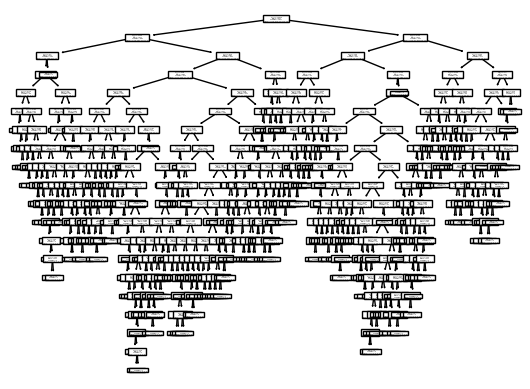

In [21]:
plot_tree(arbol)

In [22]:
predicciones=arbol.predict(X_test)

In [23]:
predicciones

array([7, 7, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 7, 6, 6, 7, 6, 7, 5, 6,
       6, 5, 6, 6, 5, 5, 5, 6, 7, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6,
       5, 7, 6, 5, 6, 6, 5, 8, 6, 5, 7, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 7,
       5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6,
       7, 5, 5, 6, 8, 6, 5, 6, 6, 5, 6, 6, 7, 7, 5, 5, 7, 7, 6, 6, 5, 6,
       5, 7, 7, 6, 5, 6, 7, 7, 6, 6, 5, 4, 5, 6, 5, 5, 5, 5, 6, 7, 6, 5,
       5, 7, 7, 5, 7, 5, 6, 7, 6, 5, 6, 5, 7, 4, 6, 5, 5, 5, 5, 6, 5, 6,
       5, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 4, 6, 6, 5, 5, 5, 5, 6, 6,
       5, 5, 5, 5, 4, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 7,
       5, 5, 6, 6, 7, 6, 7, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 4, 6,
       5, 5, 5, 5, 6, 6, 5, 4, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5],
      dtype=int64)

examen de matriz de confucion

In [24]:
pd.crosstab(np.array([y[0] for y in Y_test.values.tolist()]), predicciones,rownames=["actual"], colnames=["predicciones"])

predicciones,4,5,6,7,8
actual,,,,,
3,0,1,0,0,0
4,2,4,0,1,0
5,2,73,30,4,0
6,2,21,59,8,2
7,0,4,10,12,0
8,0,0,3,2,0


In [25]:
accuracy=accuracy_score(Y_test,predicciones)
accuracy

0.6083333333333333

concluciones: 
1. con un 80 porciento de datos para entrenamiento se obtuvo un accurracy de 0.62 lo que nos indica se se acerto en aproximadamente el 60 porciento de las veces lo cual es un porcentaje bajo
2. hay varios datos que no tiene ningun tipo de correlacion como por ejemplo el ph cpoj la acidez fija y el acido citrico o el acido citrico y la acides volatil
3. con un cambio a un porcentaje de un 70% para datos de entrenamiento no se evidencia c¿mejora alguna en la prediccion disminuyo de un 0.62 a un 0.61 en el accuracy
4.  decicidi eliminar de datos de entrenamiento los datos de acidez fija  acido citrico y ph y no se evidencia ningn cambio notorio en la prediccion,ni siquiera aumentando los datos de entrenamiento a un 85%
   